# Project: What Twitter users tweet about

## Introduction

The purpose of this project is to analyse the "interest" that users of the Twitter social network show towards events happening around the globe. The analysis seeks to "connect" tweets from Switzerland and all over the world with categories of events and specific events, based on a number of variables, e.g. the coverage of the event (how many people were interested or expressed an opinion about it on Twitter), how much Twitter users keep tweeting about an event in the following months after an event etc. With the general belief being that the social network world focuses more on less significant events than more significant ones, we would like to compare and contrast the impact of serious vs. less serious events and draw conclusions about the population's behaviour. 

In order to do so, we are going to use the dataset of Swiss tweets and the Twitter-leon dataset of global tweets. Both datasets offer a number of columns that can be exploited in the contexts of this analysis, as we will see below. Before we begin the analysis, however, it is important to define its premises and its limitations, either defined by us or imposed by the datasets themselves.

More specifically, we need to define the following premises, in the context of our analysis:

1. Which __types of events__ we are going to deal with. An event could be anything, from a festival to a scientific discovery, or even a terrorist attack. Therefore it is important that we define the bigger <u>categories</u> of events that we are going to examine, with regard to their "appearances" in the Twitter dataset, as well as the <u>specific events</u> that we could extract from the dataset, that can be sorted under these bigger categories.

2. In order to determine if Twitter users are "__interested__" in an event, we need to define a few <u>metrics</u> that we will use. Some of these metrics could be the total number of tweets that refer to an event (by either using specific hasthags or by containing specific keywords that we will define), the number of retweets to a tweet that refers to a specific event, the number of days after an event that tweets referring to the event keep appearing, etc.

3. Finally, we need to define the __premises that are going to regulate our observations__. In other words, what kinds of comparisons we wish to make between the numbers (metrics) that we will retrieve from the two datasets and whether the comparisons are going to be performed between Swiss and international Twitter users, or separately for the two populations. 

From all the above, we can see that we first need to explore and analyse our dataset a little bit, in order to be able to answer these questions in a sufficient way, according to the possibilities and contraints imposed by the datasets, before we dive into the core part of the project.

## Part I: Determine the datasets' properties

### Chapter 1: Swiss tweets dataset

In this chapter, we will take a first look at the Swiss tweets dataset, in order to determine the dataset schema, the meaning of columns, the number of rows and all other information that we can retrieve from a first, superficial analysis. After running a few Python scripts on the cluster (all of which, you can find in the project Github folder), we retrieved the following information about the dataset:

1) The dataset's schema is the following:

In [39]:
import os
import pandas as pd
import json

DATA_DIR = '.'

# swiss_tweets = pd.read_json(os.path.join(DATA_DIR, 'sample.json'))
with open(os.path.join(DATA_DIR, 'sample.json')) as f:
    swiss_tweets = json.load(f)

swiss_tweets

[{'_id': '1466077402371700047',
  '_index': 'merged_content_2016_06_10_to_2016_06_16_2',
  '_score': 0.006501974,
  '_source': {'author_avatar_img': 'https://pbs.twimg.com/profile_images/2873283197/058c9344ea769833e91065713ce621e6_bigger.jpeg',
   'author_gender': 'MALE',
   'author_handle': 'AlexLimacher',
   'author_link': 'https://twitter.com/AlexLimacher',
   'author_name': 'Alexander Limacher',
   'author_user_id': '351548364',
   'bucket': 1466077200093,
   'canonical': 'https://www.twitter.com/AlexLimacher/status/743407770360119296',
   'date_found': '2016-06-16T11:43:22Z',
   'domain': 'twitter.com',
   'geo_location': 'Switzerland',
   'geo_location_id': '4e7c21fd2af027c6',
   'hashcode': 'Lw53uPRDP_UUHns6Y_ADhOklr6U',
   'index_method': 'TWITTER_TASK',
   'lang': 'de',
   'last_updated': '2016-06-16T11:43:22Z',
   'links': ['https://www.twitter.com/hashtag/EU?src=hash',
    'https://www.twitter.com/hashtag/brexit?src=hash',
    'https://www.twitter.com/hashtag/schwexit?src=ha

For the purposes of this analysis, we chose to use only the following columns:

2) The total number of rows in the dataset is 10,828,070.

3) The dataset contains tweets written in ... different languages, with the following distribution of tweets per language:

4) The dataset contains tweets from ...-...-2016 up until ...-...-2016

5) Since, from our point of view the data of this dataset are effectively "found data" (meaning that we were not the ones collecting them), we are interested in making sure that our dataset is reliable (un-biased) enough  to lead to valid conclusions about the events that concern Swiss Twitter users. In order to be able to determine the dataset's reliability, we are going to use the __Bootstrap resampling__ method that we discussed in the course lectures, and examine the distribution of tweets per user in each different sample, in order to spot possible biases in the data.

### Chapter 2: Global tweets dataset

Let us now take a first glance at the global tweets dataset (tweets-leon), in the same way that we did in chapter 1:

1) The dataset's schema is the following:

In [34]:
global_tweets = pd.read_csv(os.path.join(DATA_DIR, 'head.csv'), 
                            delimiter='\t',
                            header = None,
                            names=['language', 'tweet_id', 'datetime', 'username', 'tweet_text'])
global_tweets.head(5)

,language,tweet_id,datetime,username,tweet_text
0,en,345963923251539968,Sat Jun 15 18:00:01 +0000 2013,Letataleta,RT @silsilfani: the world is not a wish-granti...
1,en,345963923297673217,Sat Jun 15 18:00:01 +0000 2013,JamesonN7,RT @WhosThisHoe: I'd rather sleep with a nice ...
2,en,345963923259924480,Sat Jun 15 18:00:01 +0000 2013,LauraEllynJones,Can't stand people who lie then blame it on so...
3,it,345963923276697601,Sat Jun 15 18:00:01 +0000 2013,ChialettaFClub,@ChialettaFClub: #rt seguimi ti seguo ti voto ...
4,fr,345963923255730176,Sat Jun 15 18:00:01 +0000 2013,_irem61_,RT @DHC_Music: Terrorism ... #FreePalestina ht...


The column headers are not included in the dataset, but it is easy to infer what each column could represent, just by looking at the first 5 rows. 

2) The total number of rows in the dataset is __~18 billion__. However, during our observation of the rows, we found that there are around 8 million rows with less than the 5 columns that are visible in the schema abocve. After looking into these problematic rows a bit further, we discovered that they can have any number of columns between 0 and 4. In addition, there are cases in which a single tweet can span to multiple rows, while containing no other column, apart from the tweet_text. As we will see below, in our analysis, we are really interested in having the number of tweets referring to a specific event, therefore, these problematic rows could lead to counting the same tweet multiple times and obtaining unrealistic results. For this reason, we decided to remove these rows from our analysis, also considering that 8 million out of 18 billion total rows is a rather insignificant percentage (0.04%).

3) The dataset contains tweets written in 6 different languages, with the following distribution of tweets per language:

In [12]:
tweets_per_lang = pd.read_csv(os.path.join(DATA_DIR, 'tweets_per_language.csv'), 
                  delimiter=",",
                  index_col = 0)
tweets_per_lang

,count
language,
french,676529769
dutch,452780443
italian,466666820
german,452126737
english,12488903036
spanish,3439067021


We visualise this distributions with the following pie chart:

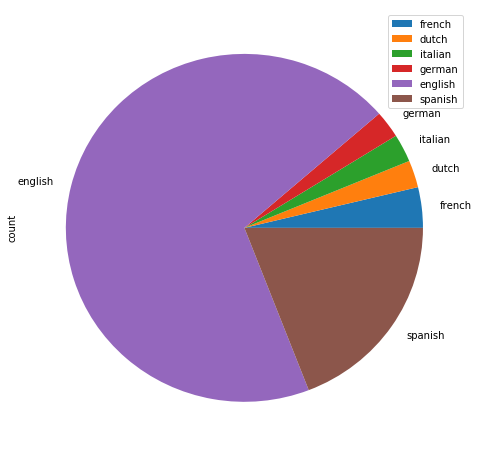

In [29]:
import matplotlib.pyplot as plt

plt.figure()
tweets_per_lang.plot(kind='pie', subplots=True, figsize=(8,8))
plt.show()

By observing the above pie chart, we can conclude that more than 50% of the tweets in the dataset are written in English, while the second biggest percentage of tweets are written in Spanish. From this, one could possibly infer that most of the tweets may come from the American continent, where these two languages are widly spoken. However, we do not have any other sufficient pieces of information that can help us determine where the tweets have come from, therefore we will not make any assumptions. We will treat the users of this dataset simply as a "global" population, without any reference to specific countries or regions. 

4) The dataset contains tweets from 15-06-2013 18:00GMT up until 01-02-2016 00:00GMT.

5) Once again, we are interested in making sure that our dataset is reliable, therefore we are going to use the __Bootstrap resampling__ method and compare the distribution of tweets per user of each "sub-sample" to one another.

## Part II: Determining the event categories and specific events to be used

### Chapter 1: Event categories

Now, that we know a little bit more about our two datasets, we are going to describe the categories of events, as well as the specific events we would like to deal with and see if we can indeed find tweets concerning them. 

Let's first determine the event categories we would like to use. For now, we have come up with the following (not exhaustive) list of categories:

__1. Political events__ <br/>
__2. Sports events__ <br/>
__3. Social crises (terrorist attacks, shootings, accidents, disease outbreaks, natural disasters etc.)__ <br/>
__4. Science and technology__ <br/>
__5. Showbiz and viral trends (e.g. trending tv series, videogames etc.)__ <br/>

The list serves mostly as a base for our analysis, rather than a final and binding list, as during our actual analysis we may come up with additional categories to add or we might decide to merge of split further the categories that we mention above.

### Chapter 2: Specific events

Regarding the specific events we would like to use, we have come up with a small list of possible events, which span from the beginning of 2013 up until the end of 2016. In order to determine if a tweet actually refers to a specific event, we are going to search for hashtags and keywords, and in the case of the Swiss tweets dataset, we will also take advantage of the "tags" columns. Below, we present an indicative (but not exhaustive) list of events that we consider interesting, along with the event category they can be sorted to, as well as indicative hashtags and keywords with which they can be searched for in our datasets. In the last two columns of the above table, we determine whether or not we were able to locate tweets referring to each specific event, in our two datasets. In order to view the full Python code used for this search, please refer to files __...__ and __...__ in our Github repository. Please also note, that the number of tweets found for each event, that are mentioned in the aforementioned files, might not be indicative of how many tweets can be found regarding these events in total. They rather serve as indications that the tweets can indeed be found in the datasets.



<table style="margin-left: 0px;">
  <tr style="border-bottom: 1px solid black;">
    <th style="text-align: left;">Event</th>
    <th style="text-align: left;">Keywords</th> 
    <th style="text-align: left;">Category</th>
    <th style="text-align: left;">Year</th>
    <th style="text-align: left;">Swiss tweets</th>
    <th style="text-align: left;">Global tweets</th>
  </tr>
  <tr>
    <td style="text-align: left;">Pope Francis' election</td> 
    <td style="text-align: left;">#PopeFrancis</td>
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Boston marathon bombing</td>
    <td style="text-align: left;">#BostonMarathon, #Bomb</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Birth of prince George of Cambridge</td>
    <td style="text-align: left;">#princeGeorge</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Twerking trend</td>
    <td style="text-align: left;">#twerk</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Nelson Mandela's death</td>
    <td style="text-align: left;">#NelsonMandela</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2013</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Ferguson shooting</td>
    <td style="text-align: left;">#FergusonShooting, #MichaelBrown</td> 
    <td style="text-align: left;">Social Crises</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Leak of nude celebrity photos</td>
    <td style="text-align: left;">#fappening</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">iPhone 6 release</td>
    <td style="text-align: left;">#iPhone6</td> 
    <td style="text-align: left;">Science and technology</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Ebola virus outbreak</td>
    <td style="text-align: left;">#Ebola</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Rosseta spacecraft lands on comet</td>
    <td style="text-align: left;">#Rosetta</td> 
    <td style="text-align: left;">Science and technology</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Kim Kardashian's photoshoot for Paper magazine</td>
    <td style="text-align: left;">#BreakTheInternet</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2014</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Grexit</td>
    <td style="text-align: left;">#Grexit</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Isis</td>
    <td style="text-align: left;">#Isis</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Syrian refugees</td>
    <td style="text-align: left;">#RefugeesWelcome</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Charlie Hebdo attack</td>
    <td style="text-align: left;">#JeSuisCharlie</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Deaths of African Americans by police actions</td>
    <td style="text-align: left;">#BlackLivesMatter</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Caitlyn Jenner's gender transition</td>
    <td style="text-align: left;">#CaitlynJenner</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">FIFAWorldCup</td>
    <td style="text-align: left;">#FIFA, #WorldCup</td> 
    <td style="text-align: left;">Sports events</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Germanwings plance crash</td>
    <td style="text-align: left;">#GermanWings</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2015</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Summer Olympics 2016</td>
    <td style="text-align: left;">#Rio2016</td> 
    <td style="text-align: left;">Sports events</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">US Elections</td>
    <td style="text-align: left;">#election2016, #Trump</td> 
    <td style="text-align: left;">Social crises</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Pokemon Go release</td>
    <td style="text-align: left;">#PokemonGo</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Brexit</td>
    <td style="text-align: left;">#Brexit</td> 
    <td style="text-align: left;">Political events</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
  <tr>
    <td style="text-align: left;">Game of Thrones</td>
    <td style="text-align: left;">#got, #GameOfThrones</td> 
    <td style="text-align: left;">Showbiz and viral trends</td>
    <td style="text-align: left;">2016</td>
    <td style="text-align: center;"></td>
    <td style="text-align: center;">&#10004;</td>
  </tr>
</table>

As we can see, only events that happened during 2016 could be found in user's tweets in the Swiss dataset. This was expected, since during our observation of the dataset, we noticed that the dates of publication of all the tweets dated back in 2016. 

On the other hand, we can find all our proposed events in the dataset of global events. However, although events like the Boston marathon bombing appears in our dataset, the actual event happened in April 2013, while our first tweet in this dataset was published in June 2013. Such is the case for the election of Pope Francis in March 2013. Although these two events could definitely be very interesting for our analysis, we decided to only analyze Twitter's reaction for events that happened after the 6th of June 2013, when our first data entry appears.

## Part III: Determining  the metrics to be used

### Chapter 1: Swiss tweets dataset

As we have observed in part I, the Swiss tweets dataset offers a wide variety of columns that help us in our effort to determine what kind of events Twitter users tweet about. With the help of these columns, we can define the following metrics that we can use in order to "measure" how much Twitter users care about a topic:

1. Total number of tweets and retweets referring to the event
2. Average number of tweets and retweets per month (and corresponding distribution per month)
3. Distribution of users' sentiments caused by the event (where available)
4. Distribution of popularity of an event (based on number of tweets and retweets) per canton/ French-speaking and German-speaking areas etc.

### Chapter 2: Global tweets dataset

The global tweets dataset, offers a more limited set of columns that we can exploit. However, this does not prevent us from performing useful analyses. Thus, for this dataset we are going to use the following metrics:

1. Total number of tweets referring to an event
2. Average number of tweets per month (and corresponding distribution per month)

## Part IV: Determining the premises of our observations

After having observed the two datasets, having defined our event categories and our metrics and having ensured that we can indeed find interesting events, we are ready to determine the strategy that we will follow, in hopes that we will end up with interesting results regarding Twitter users' reactions to major events. 

### Chapter 1: Observations in the two datasets

As we have already observed in parts I and II, there are two key differences between the Swiss tweets dataset and the global tweets dataset. The first difference, is that the two datasets contain tweets from periods of time that have very little overlap with one another. More specifically, Swiss tweets were all published during 2016, while global tweets were published between mid 2013 up until the very beginning of 2016. From that alone, we can see that it is would not be very easy to do a direct comparison of the reactions of Swiss Twitter users and global Twitter users, since we can never observe their reactions about the exact same event or during the same period of time. Additionalt, since we cannot make any conclusions regarding the countries of origin of global tweets, it would be possible that they also contain Swiss users as well, leading a comparison with Swiss users from the Swiss tweets dataset to possibly misleading results.

The second difference is that, while the Swiss tweets dataset offers a smaller number of records than the global tweets dataset, on the other hand, it offers a wider variety of possible metrics that can be used to determine Swiss Twitter users' reactions.  

For these two reasons, we decided that we are going to perform our analysis in the two populations (Swiss Twitter users and global Twitter users) separately. That being said, we are going to compare the reactions of Swiss users to specific events in the first part of our analysis, and then we will try to expand our analysis to the global population and see if we will end up with the same observations.

### Chapter 2: Observations regarding event categories

In this chapter, we are just going to restate the final goal of our analysis, which has already been described in the introduction. That is to make observations about the categories of events that seem to draw the most attention of Twitter users. That being said, we are going to fill our list of events with even more events from each one of our specified categories and we will then compare events from different categories to one another. We may also compare events from the same category to one another, in order to draw conclusions about their relative importance in their corresponding category.

### Chapter 3: Observations over time

In our final analysis, there a few choices of time periods in which we can frame our observations. One choice is to not take into account the time period that two events occured, at all, while comparing them. Another option is to only compare events that have happened during the same period of time, e.g. during the same year or even the same month. Our approach is to use all of these choices, in order to determine the impact the time period has in the Twitter users' reaction regarding a type of event.

## Part V: Dataset analysis and conclusions

In this part, we are going to roughly outline the timeline that we are going to follow, while working on our final analysis. This part will have been filled in up until Milestone 3 of the project.

### Section 1: Swiss tweets dataset analysis

#### Chapter 1: Decide on final lists of event categories and specific events to be examined

#### Chapter 2: Observations about events that occured in the same month

#### Chapter 3: Observations about events that occured in the same year

#### Chapter 4: Conclusions

### Section 2: Global tweets dataset analysis

#### Chapter 1: Decide on final lists of event categories and specific events to be examined

#### Chapter 2: Observations about events that occured in the same month

#### Chapter 3: Observations about events that occured in the same year

#### Chapter 4: Observations about events that occured in different years

#### Chapter 5: Conclusions

### Section 3: Final conclusions